http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
https://osf.io/w7tds/  unravelling

http://nbviewer.jupyter.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb

Randomforest
https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests



In [33]:
import pandas as pd                                     # for dealing with csv import
import numpy as np                                      # arrays and other matlab like manipulation
import os                                               # for joining paths and filenames sensibly
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.feature_selection import RFE

In [2]:

df = pd.read_csv('CrowdstormingDataJuly1st.csv')
df = df.iloc[:, :-9]

In [3]:
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.50
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0,1,0,0,NaN,NaN,NaN
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0,0,0,0,NaN,NaN,NaN
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
len(df.index)

146028

In [5]:
# Display the first 10 rows of the dataset. Only 13 columns for space reasons
df.ix[:10,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,1,0,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,0,0,0


In [6]:
df.columns.values


array(['playerShort', 'player', 'club', 'leagueCountry', 'birthday',
       'height', 'weight', 'position', 'games', 'victories', 'ties',
       'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards',
       'photoID', 'rater1', 'rater2'], dtype=object)

In [7]:
df.dtypes

playerShort       object
player            object
club              object
leagueCountry     object
birthday          object
height           float64
weight           float64
position          object
games              int64
victories          int64
ties               int64
defeats            int64
goals              int64
yellowCards        int64
yellowReds         int64
redCards           int64
photoID           object
rater1           float64
rater2           float64
dtype: object

# Mean skin tone

We see that there aren't any players with only one skin colour rating, thus it should be alright to find the means of those who have two rating and use those for RandomForest classification.

In [8]:
dfnew = pd.DataFrame(df, columns=['player', 'rater1', 'rater2'])
dfnew.ix[200:300,:]

,player,rater1,rater2
200,Sébastien Grax,0.00,0.25
201,Sébastien Roudet,0.00,0.25
202,Sigamary Diarra,NaN,NaN
203,Sloan Privat,NaN,NaN
204,Steeve Elana,0.75,0.75
205,Stéphane Darbion,NaN,NaN
206,Stéphen Drouin,NaN,NaN
207,Steven N'Zonzi,NaN,NaN
208,Sylvio Rodelin,0.50,0.50
209,Thiago Xavier,NaN,NaN


Generate new column which is the mean of two rater's opinions about the skin colour.

In [9]:
df['skinTone'] = ((df['rater1']+df['rater2'])/2).dropna()

In [10]:
dfnew = pd.DataFrame(df, columns=['player', 'rater1', 'rater2', 'skinTone'])
dfnew.head(10)

,player,rater1,rater2,skinTone
0,Lucas Wilchez,0.25,0.50,0.375
1,John Utaka,0.75,0.75,0.750
2,Abdón Prats,NaN,NaN,NaN
3,Pablo Marí,NaN,NaN,NaN
4,Rubén Peña,NaN,NaN,NaN
5,Aaron Hughes,0.25,0.00,0.125
6,Aleksandar Kolarov,0.00,0.25,0.125
7,Alexander Tettey,1.00,1.00,1.000
8,Anders Lindegaard,0.25,0.25,0.250
9,Andreas Beck,0.00,0.00,0.000


In [11]:
df = df[pd.notnull(df['skinTone'])]
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,skinTone
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.50,0.375
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,0.750
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0,0,0,0,3868.jpg,0.25,0.00,0.125
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,0.00,0.25,0.125
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,1.00,1.00,1.000


The number of dropped rows is not too large only around 15% of the initial dataset.

In [12]:
len(df.index)

124621

In [13]:
dif = 146028-124621
percent = dif/146028 * 100
percent

14.659517352836444

skinTone = skin rating of photo by rater (5-point scale ranging from “very light skin” to “very dark skin”)
So, we could categorize the skinTone feature, so that over 2.5 it is dark and under it is white.

In [14]:
df['skinTone'].describe()

count    124621.000000
mean          0.283559
std           0.288517
min           0.000000
25%           0.000000
50%           0.250000
75%           0.375000
max           1.000000
Name: skinTone, dtype: float64

As we see, the values are between 0 and 1, median being at 0.25, so there are more whites than people with dark skin. 
Alexander Tettey has a score of 1, and when we Google his name we see that he does have a very dark skin.

# Random Forests

In [15]:
from sklearn.ensemble import RandomForestClassifier

Good example : https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests

In [16]:
def map_objects(column):
    le = preprocessing.LabelEncoder()
    le.fit(column)
    return le.transform(column)

In [17]:
df

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,skinTone
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.50,0.375
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,0.750
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0,0,0,0,3868.jpg,0.25,0.00,0.125
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,0.00,0.25,0.125
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,1.00,1.00,1.000
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,1,0,0,0,0,0,16528.jpg,0.25,0.25,0.250
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,0,0,0,0,0,0,36499.jpg,0.00,0.00,0.000
10,antonio-rukavina,Antonio Rukavina,Real Valladolid,Spain,26.01.1984,177.0,74.0,Right Fullback,2,2,0,0,0,1,0,0,59786.jpg,0.00,0.00,0.000
11,ashkan-dejagah,Ashkan Dejagah,Fulham FC,England,05.07.1986,181.0,74.0,Left Winger,1,1,0,0,0,0,0,0,23229.jpg,0.50,0.50,0.500
12,benedikt-hoewedes,Benedikt Höwedes,FC Schalke 04,Germany,29.02.1988,187.0,80.0,Center Back,1,1,0,0,0,0,0,0,59387.jpg,0.00,0.00,0.000


In [18]:
df.dropna(inplace=True)

tosum = ['player', 'games', 'victories', 'ties', 'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards']
tocollect = ['player', 'height', 'weight', 'skinTone']
tomode = ['player', 'club', 'leagueCountry', 'position']

group1 = df[tosum].groupby('player').sum()
group2 = df[tocollect].groupby('player').first()
group3 = df[tomode].groupby('player').agg(lambda x:x.value_counts().index[0])

df = pd.concat([group1, group2, group3], axis=1)

In [90]:
def get_sets(data, split):
    data.reindex(np.random.permutation(data.index))
    
    X_train = data[:int(len(data)*split)].select_dtypes(include=['float64', 'int64'])
    X_test = data[int(len(data)*split)+1:].select_dtypes(include=['float64', 'int64'])
    
    X_train = pd.concat([X_train, data[:int(len(data)*split)].select_dtypes(include=['object']).apply(lambda x: map_objects(x))], axis=1)
    X_test = pd.concat([X_test, data[int(len(data)*split)+1:].select_dtypes(include=['object']).apply(lambda x: map_objects(x))], axis=1)
    
    y_train = pd.cut(X_train.skinTone, [-0.1, 0.25, 0.50, 0.75, 1], labels=[1, 2, 3, 4])
    y_test = pd.cut(X_test.skinTone, [-0.1, 0.25, 0.50, 0.75, 1], labels=[1, 2, 3, 4])

    X_train.drop(['skinTone'], axis=1, inplace=True)
    X_test.drop(['skinTone'], axis=1, inplace=True)
    
    return (X_train, X_test, y_train, y_test)

def get_rfe(data):
    classifier = RandomForestClassifier()
    
    X_train, X_test, y_train, y_test = get_sets(data, 0.8)
    
    selector = RFE(classifier, step=1)
    selector.fit(X_train, y_train)
    
    return selector
    
def train_and_predict(data, use=1):
    classifier = RandomForestClassifier()
    data.reindex(np.random.permutation(data.index))
    
    X_train, X_test, y_train, y_test = get_sets(data, 0.8)

    classifier.fit(X_train[:int(len(X_train)*use)], y_train[:int(len(X_train)*use)])

    precision = classifier.predict(X_test) == y_test
    precision = precision.value_counts()

    return precision[True]/sum(precision)

Xy = df
print(train_and_predict(Xy))
selector = get_rfe(Xy)

0.725978647687


In [91]:
f = pd.DataFrame()
f['column'] = Xy.columns.drop('skinTone')
f['importance'] = selector.ranking_
f['support'] = selector.support_
f.sort_values(by='importance', ascending=True)

,column,importance,support
0,games,1,True
1,victories,1,True
2,ties,1,True
4,goals,1,True
5,yellowCards,1,True
10,club,1,True
8,height,2,False
9,weight,3,False
3,defeats,4,False
12,position,5,False


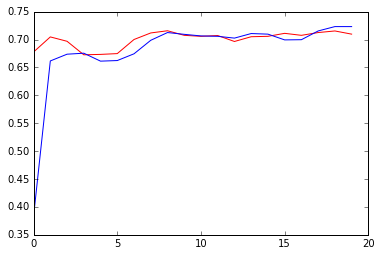

In [98]:
features1 = f[f.importance == 1].column.append(pd.Series('skinTone'))
features2 = f[f.importance != 1].column.append(pd.Series('skinTone'))

folds = 20
cv = 10

Xy = df[features1]
Xy2 = df[features2]

average = []
average2 = []
for i in range(folds):
    results = []
    results2 = []
    for j in range(cv):
        results.append(train_and_predict(Xy, (i+1)/folds))
        results2.append(train_and_predict(Xy2, (i+1)/folds))
    
    average.append(sum(results)/len(results))
    average2.append(sum(results2)/len(results2))
    
plt.plot(average, 'r-', average2, 'b-')

In [78]:
Xy.columns.values

array(['games', 'victories', 'ties', 'defeats', 'goals', 'club', 'skinTone'], dtype=object)